In [7]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
data0 = pd.read_csv("E:\Marketing, Advertising & Data Science\Python & R projects\clustering.csv")
data0.head()

,Product,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Basket-to-Detail Rate,Buy-to-Detail Rate
0,eGift Card,224020.09,3194,3208,69.83,1.00,0.00,75.00%,19962.50%
1,dusk Rewards 2 Year Membership,158950.66,17482,17482,9.09,1.00,629.99,833.33%,11654.67%
2,Danica Peach Swirl MoodMist&reg; Diffuser,122890.08,1244,1377,89.24,1.11,338.15,0.23%,2.78%
3,Callista White Ceramic MoodMist&reg; Diffuser,113011.20,1001,1033,109.40,1.03,109.08,0.07%,2.55%
4,Serena Pearl MoodMist&reg; Diffuser,89596.19,821,843,106.28,1.03,545.40,0.03%,2.98%


In [8]:
data0.insert(loc=0, column='Product Number', value=np.arange(len(data0)))
data0.head()

,Product Number,Product,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Basket-to-Detail Rate,Buy-to-Detail Rate
0,0,eGift Card,224020.09,3194,3208,69.83,1.00,0.00,75.00%,19962.50%
1,1,dusk Rewards 2 Year Membership,158950.66,17482,17482,9.09,1.00,629.99,833.33%,11654.67%
2,2,Danica Peach Swirl MoodMist&reg; Diffuser,122890.08,1244,1377,89.24,1.11,338.15,0.23%,2.78%
3,3,Callista White Ceramic MoodMist&reg; Diffuser,113011.20,1001,1033,109.40,1.03,109.08,0.07%,2.55%
4,4,Serena Pearl MoodMist&reg; Diffuser,89596.19,821,843,106.28,1.03,545.40,0.03%,2.98%


In [29]:
data0.rename({'Avg Price':'AvgPrice', 'Avg QTY':'AvgQTY', 'Product Revenue': 'ProductRevenue'}, axis=1, inplace=True)
data0.head()

,Product Number,Product,ProductRevenue,Unique Purchases,Quantity,AvgPrice,AvgQTY,Product Refund Amount,Basket-to-Detail Rate,Buy-to-Detail Rate
0,0,eGift Card,224020.09,3194,3208,69.83,1.00,0.00,75.00%,19962.50%
1,1,dusk Rewards 2 Year Membership,158950.66,17482,17482,9.09,1.00,629.99,833.33%,11654.67%
2,2,Danica Peach Swirl MoodMist&reg; Diffuser,122890.08,1244,1377,89.24,1.11,338.15,0.23%,2.78%
3,3,Callista White Ceramic MoodMist&reg; Diffuser,113011.20,1001,1033,109.40,1.03,109.08,0.07%,2.55%
4,4,Serena Pearl MoodMist&reg; Diffuser,89596.19,821,843,106.28,1.03,545.40,0.03%,2.98%


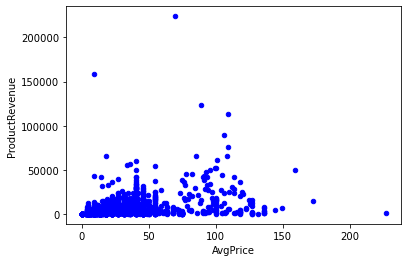

In [30]:
data0.plot.scatter(x='AvgPrice', y='ProductRevenue', color='blue')
plt.show()

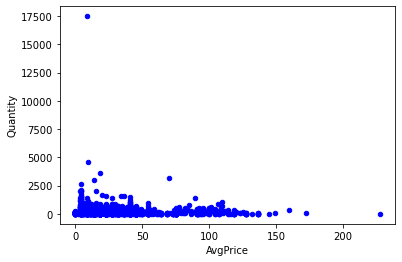

In [40]:
data0.plot.scatter(x='AvgPrice', y='Quantity', color='blue')
plt.show()

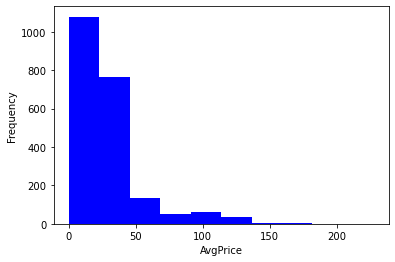

In [35]:
data0.AvgPrice.plot.hist(color='blue')
plt.xlabel('AvgPrice')
plt.show()

In [34]:
data0.AvgPrice.mean()

29.782410881801006

In [38]:
data_scaled = data0.copy()
cols_to_scale = ['AvgPrice', 'Quantity', 'ProductRevenue']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled[cols_to_scale] = scaler.fit_transform(data_scaled[cols_to_scale])

In [39]:
data_scaled.head()

,Product Number,Product,ProductRevenue,Unique Purchases,Quantity,AvgPrice,AvgQTY,Product Refund Amount,Basket-to-Detail Rate,Buy-to-Detail Rate
0,0,eGift Card,20.710792,3194,6.318024,1.604445,1.00,0.00,75.00%,19962.50%
1,1,dusk Rewards 2 Year Membership,14.547695,17482,36.369433,-0.829010,1.00,629.99,833.33%,11654.67%
2,2,Danica Peach Swirl MoodMist&reg; Diffuser,11.132193,1244,2.463174,2.382077,1.11,338.15,0.23%,2.78%
3,3,Callista White Ceramic MoodMist&reg; Diffuser,10.196508,1001,1.738942,3.189756,1.03,109.08,0.07%,2.55%
4,4,Serena Pearl MoodMist&reg; Diffuser,7.978739,821,1.338930,3.064758,1.03,545.40,0.03%,2.98%


In [41]:
data_scaled.describe()

,Product Number,ProductRevenue,Unique Purchases,Quantity,AvgPrice,AvgQTY,Product Refund Amount
count,2132.000000,2.132000e+03,2132.000000,2.132000e+03,2.132000e+03,2132.000000,2132.000000
mean,1065.500000,-3.150492e-16,154.727486,-3.509804e-17,-7.090430e-16,1.354536,20.245249
std,615.599708,1.000235e+00,425.083318,1.000235e+00,1.000235e+00,0.609105,80.532433
min,0.000000,-5.074265e-01,0.000000,-4.358586e-01,-1.193186e+00,0.000000,0.000000
25%,532.750000,-4.285824e-01,34.000000,-3.411189e-01,-6.471215e-01,1.080000,0.000000
50%,1065.500000,-2.814823e-01,86.000000,-2.042728e-01,-2.829446e-01,1.190000,0.000000
75%,1598.250000,3.519113e-02,187.250000,7.784074e-02,4.454091e-01,1.370000,0.000000
max,2131.000000,2.071079e+01,17482.000000,3.636943e+01,7.912037e+00,10.800000,1717.650000


In [42]:
from sklearn.cluster import KMeans
cluster_cols = ['ProductRevenue', 'AvgPrice']
markers = ['x', '*', '.', '|', '_', '1', '2']

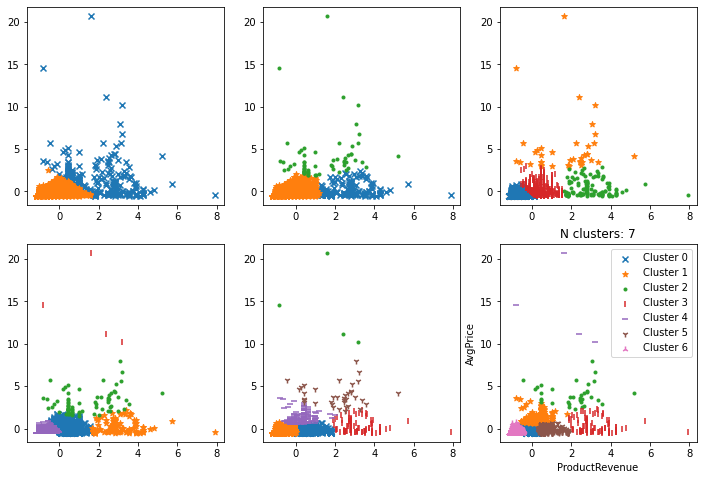

In [60]:
plt.figure(figsize=[12,8])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    data_scaled['Cluster']= model.fit_predict(data_scaled[cluster_cols])
    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = data_scaled[data_scaled.Cluster == clust]
        plt.scatter(temp.AvgPrice, temp.ProductRevenue, marker=markers[clust], label="Cluster "+str(clust))
plt.title("N clusters: "+str(n))
plt.xlabel('ProductRevenue')
plt.ylabel('AvgPrice')
plt.legend()
plt.show()

In [61]:
K = 3
model = KMeans(n_clusters=K, random_state=42)
model.fit(data_scaled[cluster_cols])

KMeans(n_clusters=3, random_state=42)

In [62]:
print(model.inertia_)

1846.946282285996


In [63]:
X = data_scaled[cluster_cols]
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)

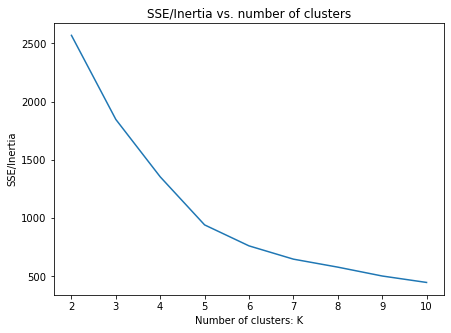

In [64]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores)
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

In [73]:
data_scaled.head()

,Product Number,Product,ProductRevenue,Unique Purchases,Quantity,AvgPrice,AvgQTY,Product Refund Amount,Basket-to-Detail Rate,Buy-to-Detail Rate,Cluster
0,0,eGift Card,20.710792,3194,6.318024,1.604445,1.00,0.00,75.00%,19962.50%,4
1,1,dusk Rewards 2 Year Membership,14.547695,17482,36.369433,-0.829010,1.00,629.99,833.33%,11654.67%,4
2,2,Danica Peach Swirl MoodMist&reg; Diffuser,11.132193,1244,2.463174,2.382077,1.11,338.15,0.23%,2.78%,4
3,3,Callista White Ceramic MoodMist&reg; Diffuser,10.196508,1001,1.738942,3.189756,1.03,109.08,0.07%,2.55%,4
4,4,Serena Pearl MoodMist&reg; Diffuser,7.978739,821,1.338930,3.064758,1.03,545.40,0.03%,2.98%,2


In [76]:
data_scaled.groupby('Cluster')[['ProductRevenue', 'AvgPrice', 'Cluster']].head()

,ProductRevenue,AvgPrice,Cluster
0,20.710792,1.604445,4
1,14.547695,-0.829010,4
2,11.132193,2.382077,4
3,10.196508,3.189756,4
4,7.978739,3.064758,2
5,6.708115,3.198170,2
6,5.717263,2.217416,2
7,5.713258,-0.464833,2
8,5.666669,3.159308,2
23,3.611894,-0.811382,1


In [77]:
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

,Product Number,Product,ProductRevenue,Unique Purchases,Quantity,AvgPrice,AvgQTY,Product Refund Amount,Basket-to-Detail Rate,Buy-to-Detail Rate,Cluster
0,0,eGift Card,20.710792,3194,6.318024,1.604445,1.00,0.00,75.00%,19962.50%,2
1,1,dusk Rewards 2 Year Membership,14.547695,17482,36.369433,-0.829010,1.00,629.99,833.33%,11654.67%,2
2,2,Danica Peach Swirl MoodMist&reg; Diffuser,11.132193,1244,2.463174,2.382077,1.11,338.15,0.23%,2.78%,2


In [78]:
data_scaled['Cluster'].value_counts()

1    1910
0     156
2      66
Name: Cluster, dtype: int64

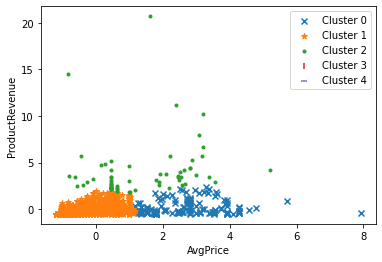

In [81]:
markers = ['x', '*', '.', '|', '_']
for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.AvgPrice, temp.ProductRevenue, marker=markers[clust], label="Cluster "+str(clust))
plt.xlabel('AvgPrice')
plt.ylabel('ProductRevenue')
plt.legend()
plt.show()

In [83]:
data_scaled.groupby('Cluster')[['AvgPrice', 'ProductRevenue']].head()

,AvgPrice,ProductRevenue
0,1.604445,20.710792
1,-0.829010,14.547695
2,2.382077,11.132193
3,3.189756,10.196508
4,3.064758,7.978739
51,3.295524,2.347196
62,3.373648,2.159452
63,2.498261,2.119548
64,2.968205,2.099680
65,2.576785,2.050590


In [85]:
data_scaled

,Product Number,Product,ProductRevenue,Unique Purchases,Quantity,AvgPrice,AvgQTY,Product Refund Amount,Basket-to-Detail Rate,Buy-to-Detail Rate,Cluster
0,0,eGift Card,20.710792,3194,6.318024,1.604445,1.00,0.00,75.00%,19962.50%,2
1,1,dusk Rewards 2 Year Membership,14.547695,17482,36.369433,-0.829010,1.00,629.99,833.33%,11654.67%,2
2,2,Danica Peach Swirl MoodMist&reg; Diffuser,11.132193,1244,2.463174,2.382077,1.11,338.15,0.23%,2.78%,2
3,3,Callista White Ceramic MoodMist&reg; Diffuser,10.196508,1001,1.738942,3.189756,1.03,109.08,0.07%,2.55%,2
4,4,Serena Pearl MoodMist&reg; Diffuser,7.978739,821,1.338930,3.064758,1.03,545.40,0.03%,2.98%,2
...,...,...,...,...,...,...,...,...,...,...,...
2127,2127,Mandarin &amp; Musk White Water Scented Votive...,-0.507427,0,-0.435859,-1.193186,0.00,0.00,233.33%,0.00%,1
2128,2128,Patchouli &amp; Vanilla Amber Nights Fragrant ...,-0.507427,0,-0.435859,-1.193186,0.00,0.00,51.12%,0.00%,1
2129,2129,PicknMix Melt Tube,-0.507427,1,-0.433753,-1.193186,1.00,0.00,0.00%,12.50%,1
2130,2130,Rose &amp; Spices Love Scented Tealight Candle...,-0.507427,0,-0.435859,-1.193186,0.00,0.00,100.00%,0.00%,1


In [87]:
data_scaled.to_csv(r'E:\Marketing, Advertising & Data Science\Python & R projects\dusk.csv', index=False)